# Statystyka matematyczna - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu: 2.21
Członkowie: Dominik Sakłaski - 415120
            Dominika Pudło - 415180
            Karolina Murzyn - 409892
            Jan Dworak - 412302


---

# Zestaw zadań 4: Elementy eksploracyjnej analizy danych

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
from scipy.stats import linregress


### Dane do zadań

Plik wine_data.csv zawiera wyniki pomiarów kilku wybranych parametrów win pochodzących z tego samego rejonu Włoch, ale wyprodukowanych z trzech różnych odmian (ang. cultivar) winogron:

 - Alcohol (Alkohol) - procentowa zawartości alkoholu w winie.
 - Malic acid (kwas jabłkowy) - rodzaj kwasu obecnego w winogronach i innych owocach.
 - Ash (popiół) - reprezentuje pozostałości po fermentacji winogron, obejmujące składniki mineralne, takie jak potas i wapń.
 - Flavanoids (flawonoidy) - rodzaj związku fenolowego.
 - Color intensity (intensywność koloru) - mierzy jak głęboki lub intensywny jest kolor.
 - OD280/OD315 (absorbancja przy 280/315 nm wina rozcieńczonego) - miara absorpcji światła przy określonych długościach fal.

W celu wczytania danych do notatnika umieść plik w tym samym folderze, w którym znajduje się notatnik.

Źródło danych: Aeberhard S., Forina M. Leardi R.; Wine; DOI: 10.24432/C5PC7J; https://archive.ics.uci.edu/dataset/109/wine

In [3]:
data = pd.read_csv("wine_data.csv", delimiter=",", index_col=0)
data.head(10)

,Cultivar,Alcohol,Malic acid,Ash,Flavanoids,Color intensity,OD280/OD315
0,2,11.81,2.12,2.74,0.99,2.50,2.26
1,3,13.40,4.60,2.86,0.96,8.50,1.92
2,1,13.56,1.71,2.31,3.29,6.13,3.38
3,3,13.73,4.36,2.26,0.47,6.62,1.75
4,2,12.17,1.45,2.53,1.75,2.95,2.23
5,3,14.13,4.10,2.74,0.76,9.20,1.60
6,1,13.68,1.83,2.36,2.69,3.84,2.87
7,3,13.40,3.91,2.48,0.75,7.30,1.56
8,1,13.86,1.35,2.27,3.15,7.22,3.55
9,2,12.33,1.10,2.28,1.09,3.27,1.67


### Zadanie 1: Wybrane typy wykresów [4 pkt]

Korzystając z funkcji `seaborn.boxplot()`, `seaborn.violinplot()`, `seaborn.stripplot()` i `seaborn.swarmplot()` przygotuj wykresy wybranego przez siebie parametru (oś Y) z podziałem na poszczególne odmiany winogron (oś X).

Wykresy (po jednym każdego typu) zestaw na pojedynczej figurze (2x2 pola na wykres). Przygotowując figurę kieruj się wytycznymi z początku notatnika. Dodatkowo ustaw:
 - dla wykresu boxplot:
     - inny od domyślnego kolor wykresu oraz widoczny znacznik wartości średniej,
 - dla wykresu violinplot:
     - inny od domyślnego kolor wykresu,
 - dla wykresu stripplot:
     - inne od domyślnych rozmiar, kolor i przeźroczystość punktów (dobierz parametry tak, aby wykres był jak najbardziej przejrzysty),
 - dla wykresu swarmplot:
     - inne od domyślnych rozmiar i kolor punktów (dobierz rozmiar tak, aby na wykresie zmieścił się komplet punktów).


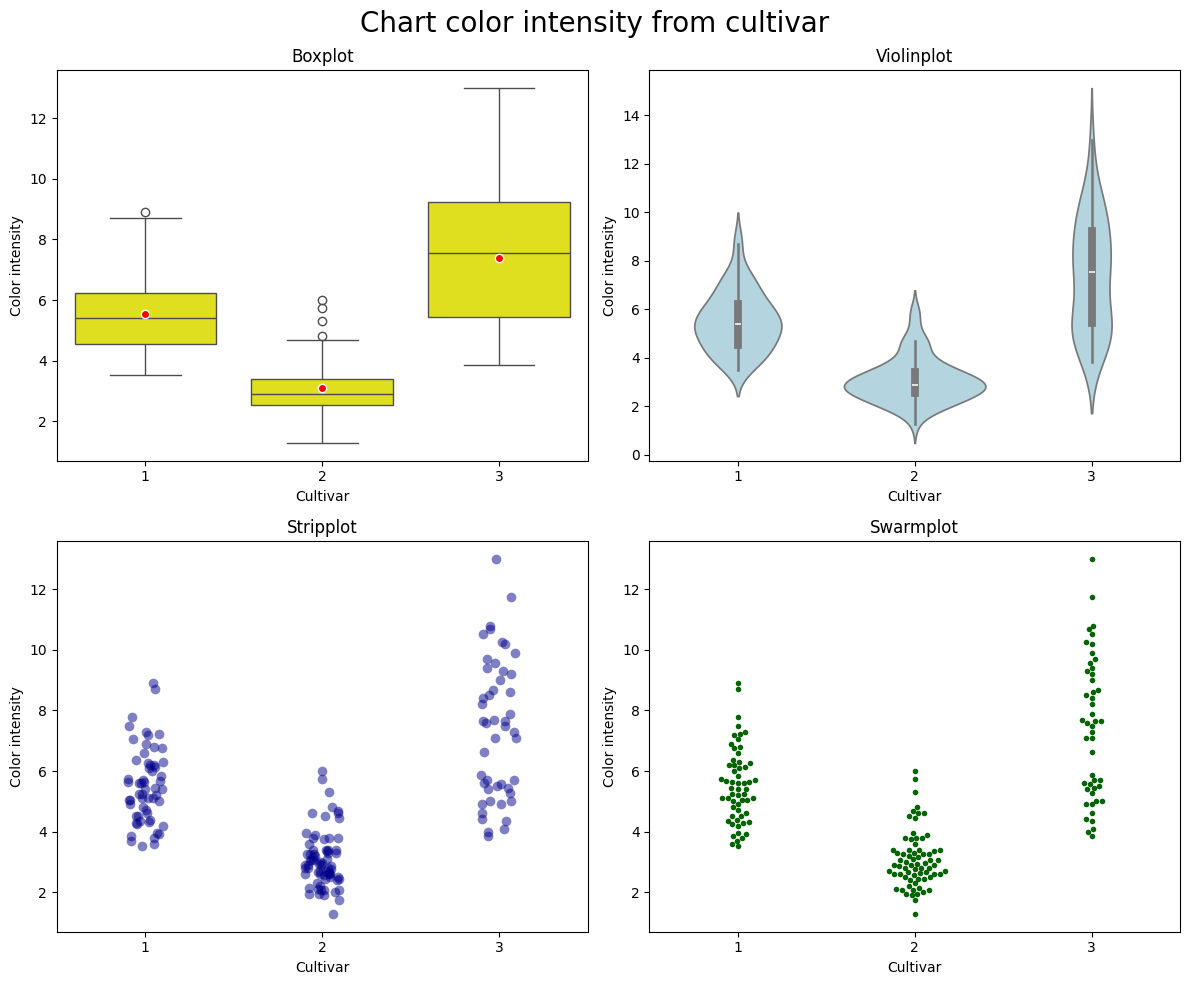

In [4]:
# YOUR CODE HERE




fig, axes = plt.subplots(2, 2, figsize=(12, 10), facecolor='white')
fig.suptitle("Chart color intensity from cultivar", size=20)

sns.boxplot(x="Cultivar", y="Color intensity", data=data, color='Yellow', showmeans=True, meanprops={"marker":"o","markerfacecolor":"Red", "markeredgecolor":"White"}, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot')


sns.violinplot(x="Cultivar", y="Color intensity", data=data, color='Lightblue', ax=axes[0, 1])
axes[0, 1].set_title('Violinplot')


sns.stripplot(x="Cultivar", y="Color intensity", data=data, size=7, color='Darkblue', alpha=0.5, ax=axes[1, 0])
axes[1, 0].set_title('Stripplot')


sns.swarmplot(x="Cultivar", y="Color intensity", data=data, size=4, color='Darkgreen', ax=axes[1, 1])
axes[1, 1].set_title('Swarmplot')


plt.tight_layout() 
plt.show()

### Zadanie 2: Przygotowanie wykresów do analizy danych ze względu na jedną cechę [6 pkt]

#### a) Wykresy boxplot lub violinplot
Korzystając z funkcji `seaborn.boxplot()` lub `seaborn.violinplot()` (wybierz preferowany przez siebie typ wykresu) przygotuj wykresy wszystkich parametrów (oś Y) z podziałem na poszczególne odmiany winogron (oś X).

Wykresy zestaw na pojedynczej figurze (2x3 pola na wykres). Przygotowując figurę kieruj się wytycznymi z początku notatnika (nie musisz jednak ustawiać tytułów poszczególnych wykresów). Dodatkowo ustaw:
 - identyczną dla wszystkich wykresów i inną od domyślnej skalę kolorów (każda odmiana ma przypisany inny kolor wykresu),
 - brak widocznej legendy na wykresach,
 - widoczny znacznik wartości średniej.

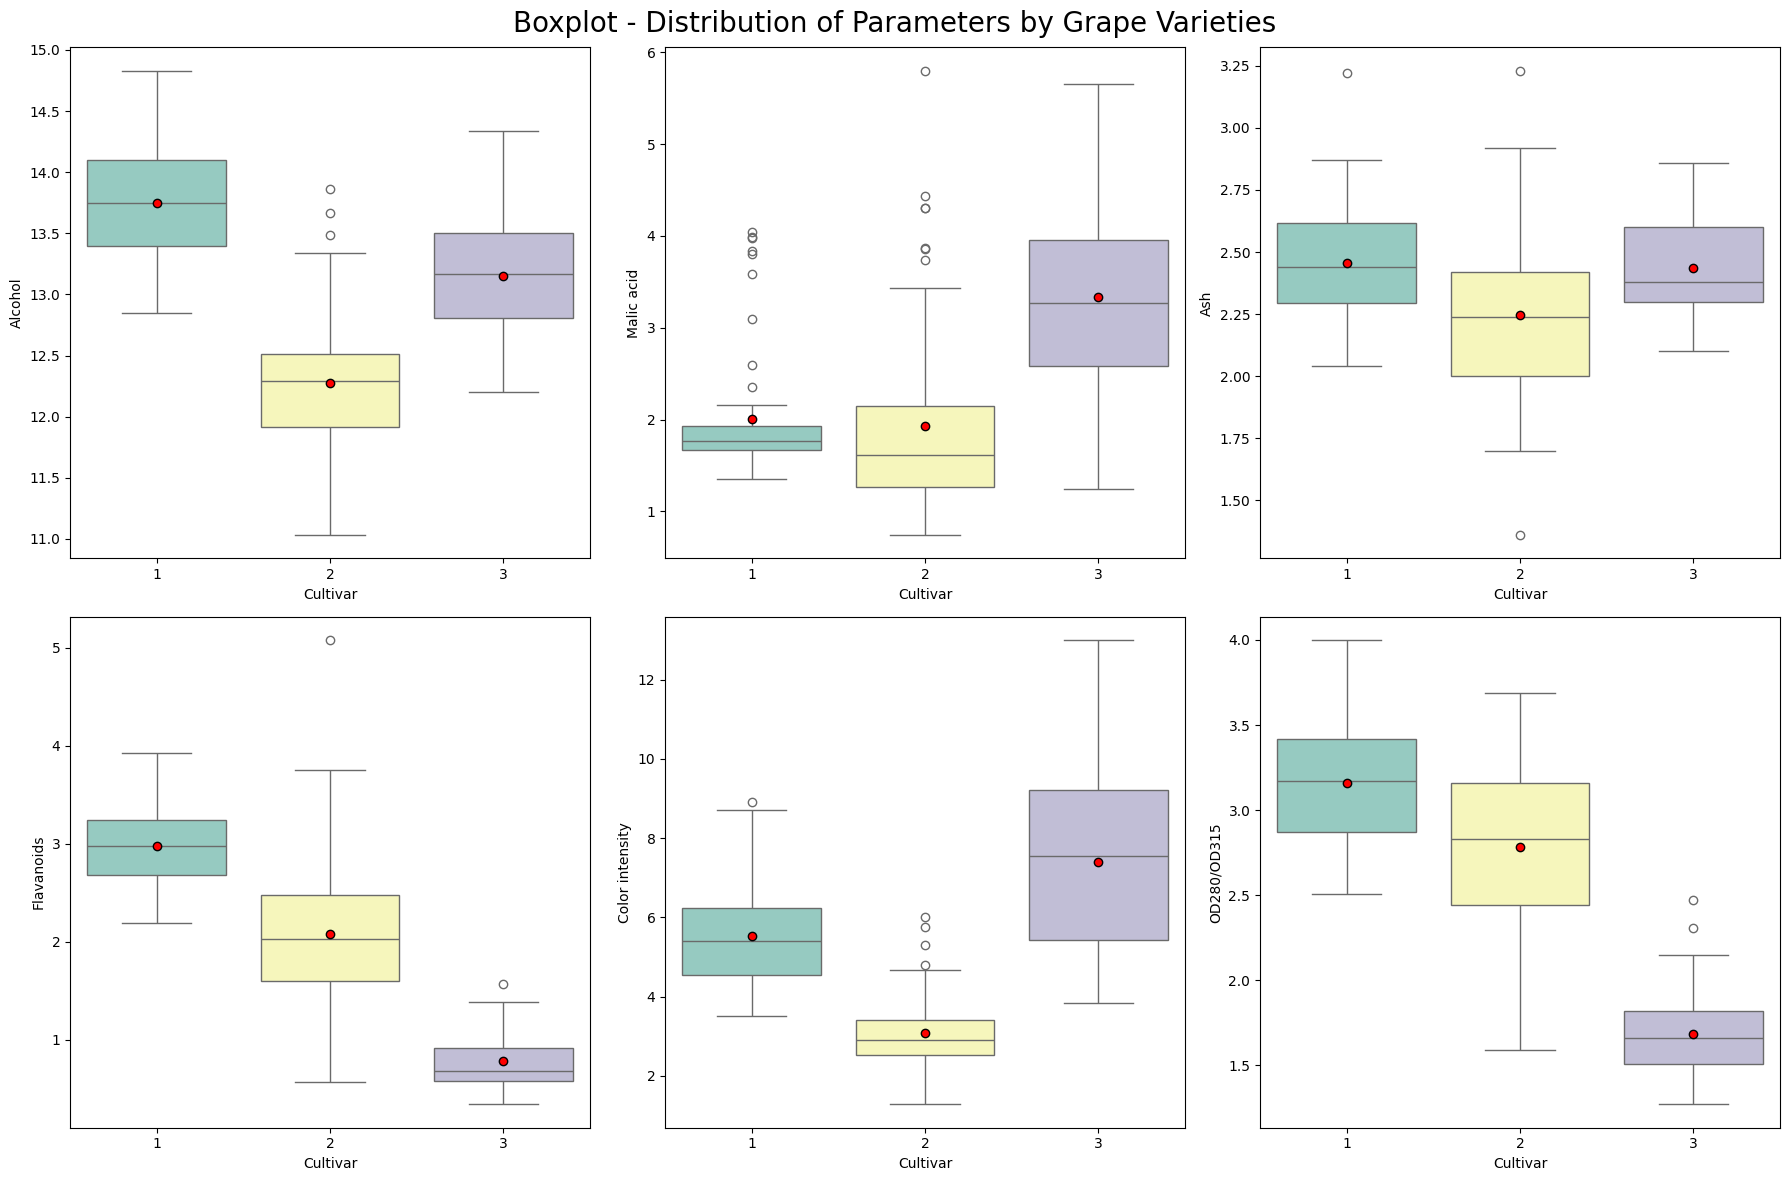

In [5]:
# YOUR CODE HERE
fig, axes = plt.subplots(2, 3, figsize=(18, 12), facecolor='white')
fig.suptitle("Boxplot - Distribution of Parameters by Grape Varieties", size=20)

sns.boxplot(x='Cultivar', y='Alcohol', hue='Cultivar', data=data, ax=axes[0, 0],showmeans=True, palette='Set3', meanprops={"marker":"o","markerfacecolor":"red", "markeredgecolor":"black"}, legend=False)

sns.boxplot(x='Cultivar', y='Malic acid', hue='Cultivar', data=data, ax=axes[0, 1], showmeans=True, palette='Set3', meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black"}, legend=False)

sns.boxplot(x='Cultivar', y='Ash', hue='Cultivar', data=data, ax=axes[0, 2], showmeans=True, palette='Set3', meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black"}, legend=False)

sns.boxplot(x='Cultivar', y='Flavanoids',  hue='Cultivar', data=data, ax=axes[1, 0], showmeans=True, palette='Set3', meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black"}, legend=False)

sns.boxplot(x='Cultivar', y='Color intensity', hue='Cultivar', data=data, ax=axes[1, 1], showmeans=True, palette='Set3', meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black"}, legend=False)

sns.boxplot(x='Cultivar', y='OD280/OD315', hue='Cultivar', data=data, ax=axes[1, 2], showmeans=True, palette='Set3', meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black"}, legend=False)

plt.tight_layout()  

plt.show()

#### b) Wykresy stripplot lub swarmplot

Korzystając z funkcji `seaborn.stripplot()` lub `seaborn.swarmplot()` (wybierz preferowany przez siebie typ wykresu) przygotuj wykresy wszystkich parametrów (oś Y) z podziałem na poszczególne odmiany winogron (oś X).

Wykresy zestaw na pojedynczej figurze (2x3 pola na wykres). Przygotowując figurę kieruj się wytycznymi z początku notatnika (nie musisz jednak ustawiać tytułów poszczególnych wykresów). Dodatkowo ustaw:
 - identyczną dla wszystkich wykresów i inną od domyślnej skalę kolorów (każda odmiana ma przypisany inny kolor wykresu),
 - brak widocznej legendy na wykresach,
 - inne od domyślnych rozmiar i przeźroczystość punktów.

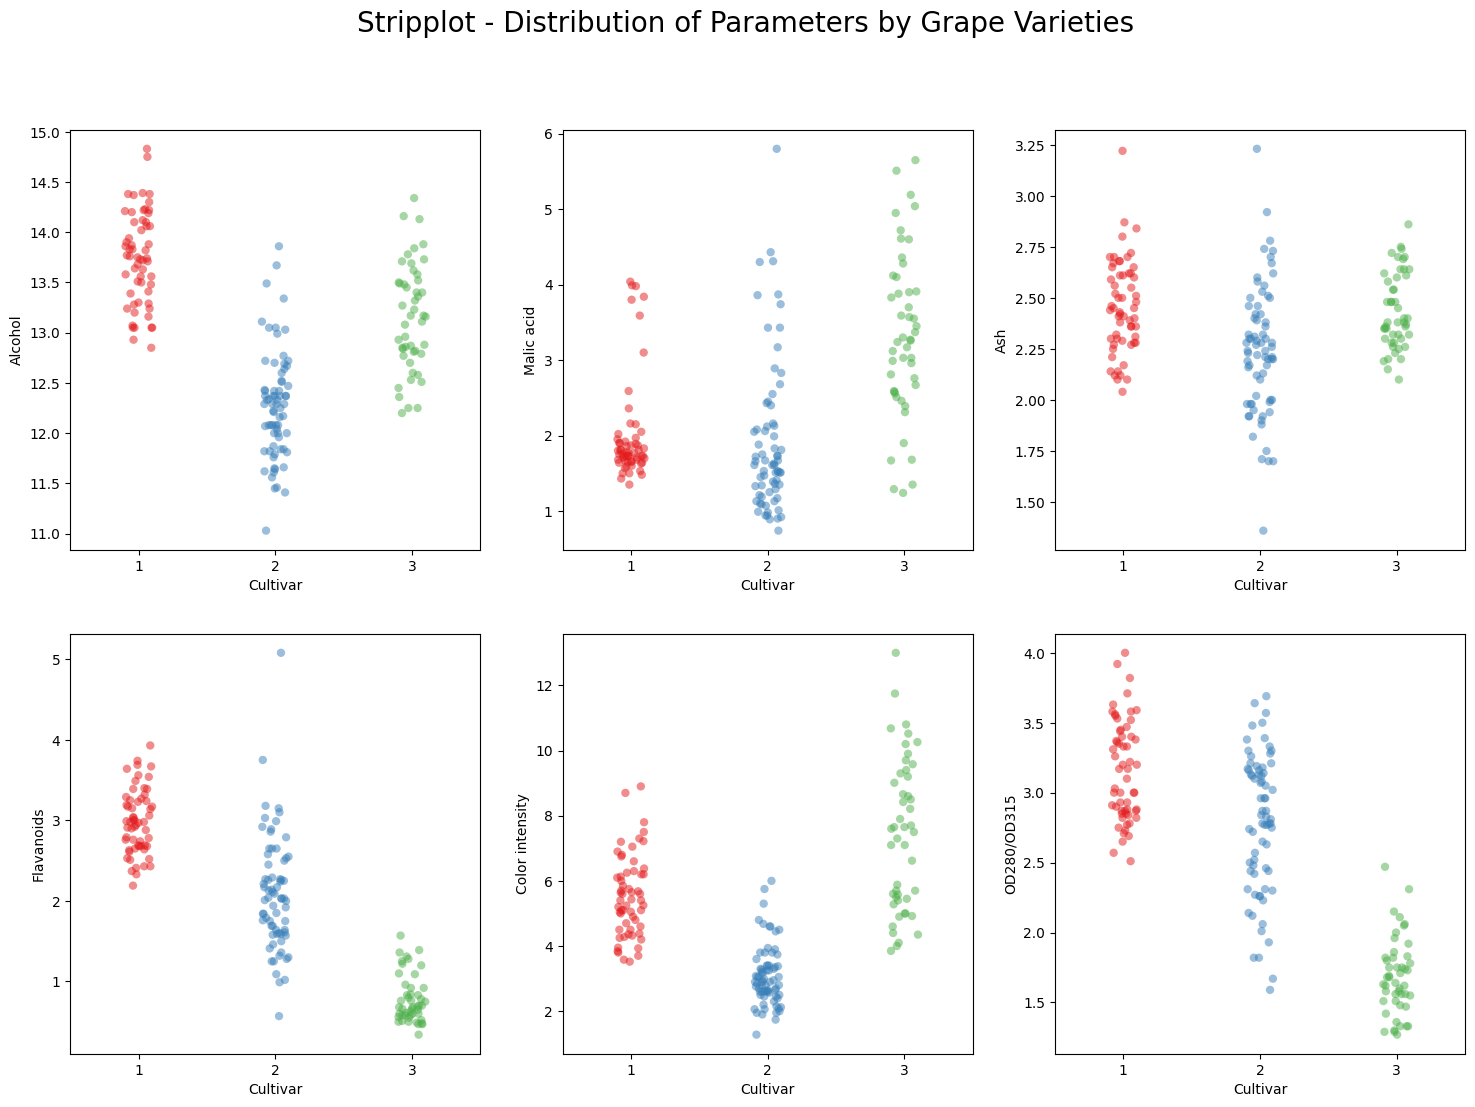

In [6]:
# YOUR CODE HERE
fig, axes = plt.subplots(2, 3, figsize=(18, 12), facecolor='white')
fig.suptitle("Stripplot - Distribution of Parameters by Grape Varieties", size=20)

sns.stripplot(x='Cultivar', y='Alcohol', data=data, ax=axes[0, 0], size=6, alpha=0.5, hue='Cultivar',  palette='Set1', legend=False, facecolor='green')

sns.stripplot(x='Cultivar', y='Malic acid', data=data, ax=axes[0, 1], size=6, alpha=0.5, hue='Cultivar', palette='Set1', legend=False)

sns.stripplot(x='Cultivar', y='Ash', data=data, ax=axes[0, 2], size=6, alpha=0.5, hue='Cultivar', palette='Set1', legend=False)

sns.stripplot(x='Cultivar', y='Flavanoids', data=data, ax=axes[1, 0], size=6, alpha=0.5, hue='Cultivar', palette='Set1', legend=False)

sns.stripplot(x='Cultivar', y='Color intensity', data=data, ax=axes[1, 1], size=6, alpha=0.5, hue='Cultivar', palette='Set1', legend=False)

sns.stripplot(x='Cultivar', y='OD280/OD315', data=data, ax=axes[1, 2], size=6, alpha=0.5, hue='Cultivar',  palette='Set1', legend=False)

#plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()






### Zadanie 3: Podstawowe statystyki opisowe [3 pkt]

Koszystając z funkcji `pandas.Dataframe.descrtibe()` przygotuj tablicę `statistics` z podstawowymi statystykami opisowymi rozkładów poszczególnych parametrów.
Następnie korzystając z odpowiednich funkcji pakietu scipy.stats (https://docs.scipy.org/doc/scipy/reference/stats.html#summary-statistics) dodaj na końcu tablicy wiersze o nazwach "skew" i "kurt" z obliczonymi wartościami skośności i kurtozy rozkładów poszczególnych parametrów.

In [7]:
# YOUR CODE HERE
statistics = data.describe()

skewness = data.apply(sp.stats.skew)
kurtosis_values = data.apply(sp.stats.kurtosis)

statistics.loc['skew'] = sp.stats.skew(data)
statistics.loc['kurt'] = sp.stats.kurtosis(data)

statistics

,Cultivar,Alcohol,Malic acid,Ash,Flavanoids,Color intensity,OD280/OD315
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,2.029270,5.058090,2.611685
std,0.775035,0.811827,1.117146,0.274344,0.998859,2.318286,0.709990
min,1.000000,11.030000,0.740000,1.360000,0.340000,1.280000,1.270000
25%,1.000000,12.362500,1.602500,2.210000,1.205000,3.220000,1.937500
50%,2.000000,13.050000,1.865000,2.360000,2.135000,4.690000,2.780000
75%,3.000000,13.677500,3.082500,2.557500,2.875000,6.200000,3.170000
max,3.000000,14.830000,5.800000,3.230000,5.080000,13.000000,4.000000
skew,0.106524,-0.051047,1.030869,-0.175207,0.025129,0.861248,-0.304690
kurt,-1.319440,-0.862260,0.257348,1.078576,-0.889365,0.337370,-1.089675


In [8]:
# Komórka testowa
assert type(statistics) == pd.DataFrame
assert statistics.shape == (10, 7)
assert np.all(statistics.columns == ['Cultivar', 'Alcohol', 'Malic acid', 'Ash', 'Flavanoids', 'Color intensity', 'OD280/OD315'])
assert np.all(statistics.index == ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'skew','kurt'])
assert np.all(np.isclose(np.sum(statistics.values, axis=0), [189.50032053, 255.84913695, 195.8317122 , 193.26173022, 191.79889282, 214.96499357, 193.08481056]))
assert np.all(np.isclose(np.sum(statistics.values, axis=1), [1246., 29.34073033, 7.00548662, 17.02, 23.5375, 28.88, 34.5625, 48.94, 1.49282653, -2.48744664]))

### Zadanie 4: Korelacja liniowa [7 pkt]

#### a) Manualne obliczanie korelacji liniowej
Korzystając ze wzorów manualnie oblicz współczynnik korelacji liniowej `r` parametrów OD280/OD315 (oś X) i Flavanoids (oś Y).

In [9]:
# Współczynnik korelacji liniowej
# YOUR CODE HERE

x = data.loc[:, 'OD280/OD315']
y = data.loc[:, 'Flavanoids']

mean_x = np.mean(x)
mean_y = np.mean(y)

licznik = np.sum((x - mean_x) * (y - mean_y))
mianownik = (np.sqrt(np.sum((x - mean_x)**2))) * (np.sqrt(np.sum((y - mean_y)**2)))

if mianownik != 0:
    r = licznik / mianownik
else:
    r = 0
r


0.7871939018669516

In [10]:
# Komórka testowa
assert np.isclose(r, 0.7871939018669515)

#### b) Obliczanie korelacji liniowej z wykorzystaniem dedykowanych funkcji

Korzystając ze funkcji `pandas.DataFrame.corr()` przygotuj tablice współczynników korelacji liniowej `r_table` wszystkich możliwych par analizowanych parametrów.

In [11]:
# Współczynniki korelacji liniowej
# YOUR CODE HERE
r_table = data.corr()
print("Tablica współczynników korelacji liniowej:")
r_table

Tablica współczynników korelacji liniowej:


,Cultivar,Alcohol,Malic acid,Ash,Flavanoids,Color intensity,OD280/OD315
Cultivar,1.000000,-0.328222,0.437776,-0.049643,-0.847498,0.265668,-0.788230
Alcohol,-0.328222,1.000000,0.094397,0.211545,0.236815,0.546364,0.072343
Malic acid,0.437776,0.094397,1.000000,0.164045,-0.411007,0.248985,-0.368710
Ash,-0.049643,0.211545,0.164045,1.000000,0.115077,0.258887,0.003911
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,1.000000,-0.172379,0.787194
Color intensity,0.265668,0.546364,0.248985,0.258887,-0.172379,1.000000,-0.428815
OD280/OD315,-0.788230,0.072343,-0.368710,0.003911,0.787194,-0.428815,1.000000


In [12]:
# Komórka testowa
assert type(r_table) == pd.DataFrame
assert r_table.shape == (7, 7)
assert list(r_table.columns) == list(r_table.index)
assert np.all(r_table.values>=-1)
assert np.all(r_table.values<=1)
assert np.all(r_table.mean(axis=0) == r_table.mean(axis=1))

#### c) Wizualizacja współczynników korelacji

Wykorzystaj funkcję `seaborn.heatmap()` do zwizualizowania obliczonych wartości współczynników korelacji liniowej.

Przygotowując figurę kieruj się wytycznymi z początku notatnika. Dodatkowo ustaw:
 - inną od domyślnej skalę kolorów,
 - widoczne na wykresie wartości współczynników.

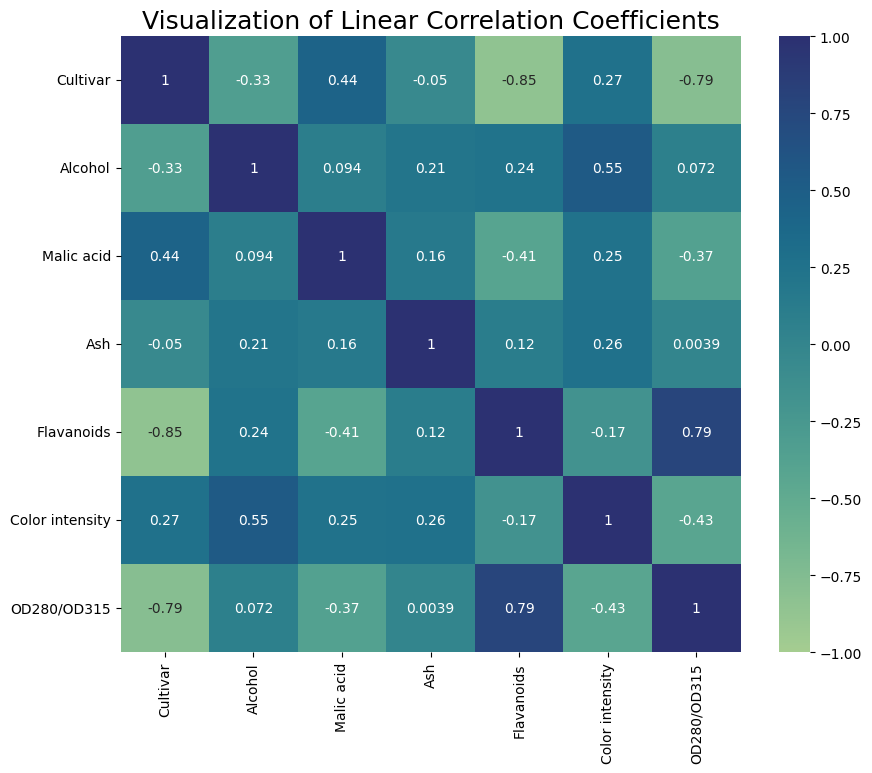

In [13]:
# YOUR CODE HERE
fig, ax = plt.subplots(figsize=(10, 8), facecolor='white')

sns.heatmap(r_table, annot=True, cmap="crest", vmin=-1, vmax=1)
ax.set_title("Visualization of Linear Correlation Coefficients", size=18)

plt.show()

#### d) Wykresy korelacyjne

Korzystając z funkcji `seaborn.pairplot()` przygotuj wykresy korelacyjne zestawiające ze sobą poszczególne parametry (osie X, Y) z podziałem na poszczególne odmiany winogron (rozróżnione kolorem) i ustaw:
 - inną od domyślnej skalę kolorów (każda odmiana ma przypisany inny kolor wykresu),
 - inne od domyślnych własności punktów (kształt, wielkość, przeźroczystość) dobrane tak, aby wykres był jak najbardziej czytelny.

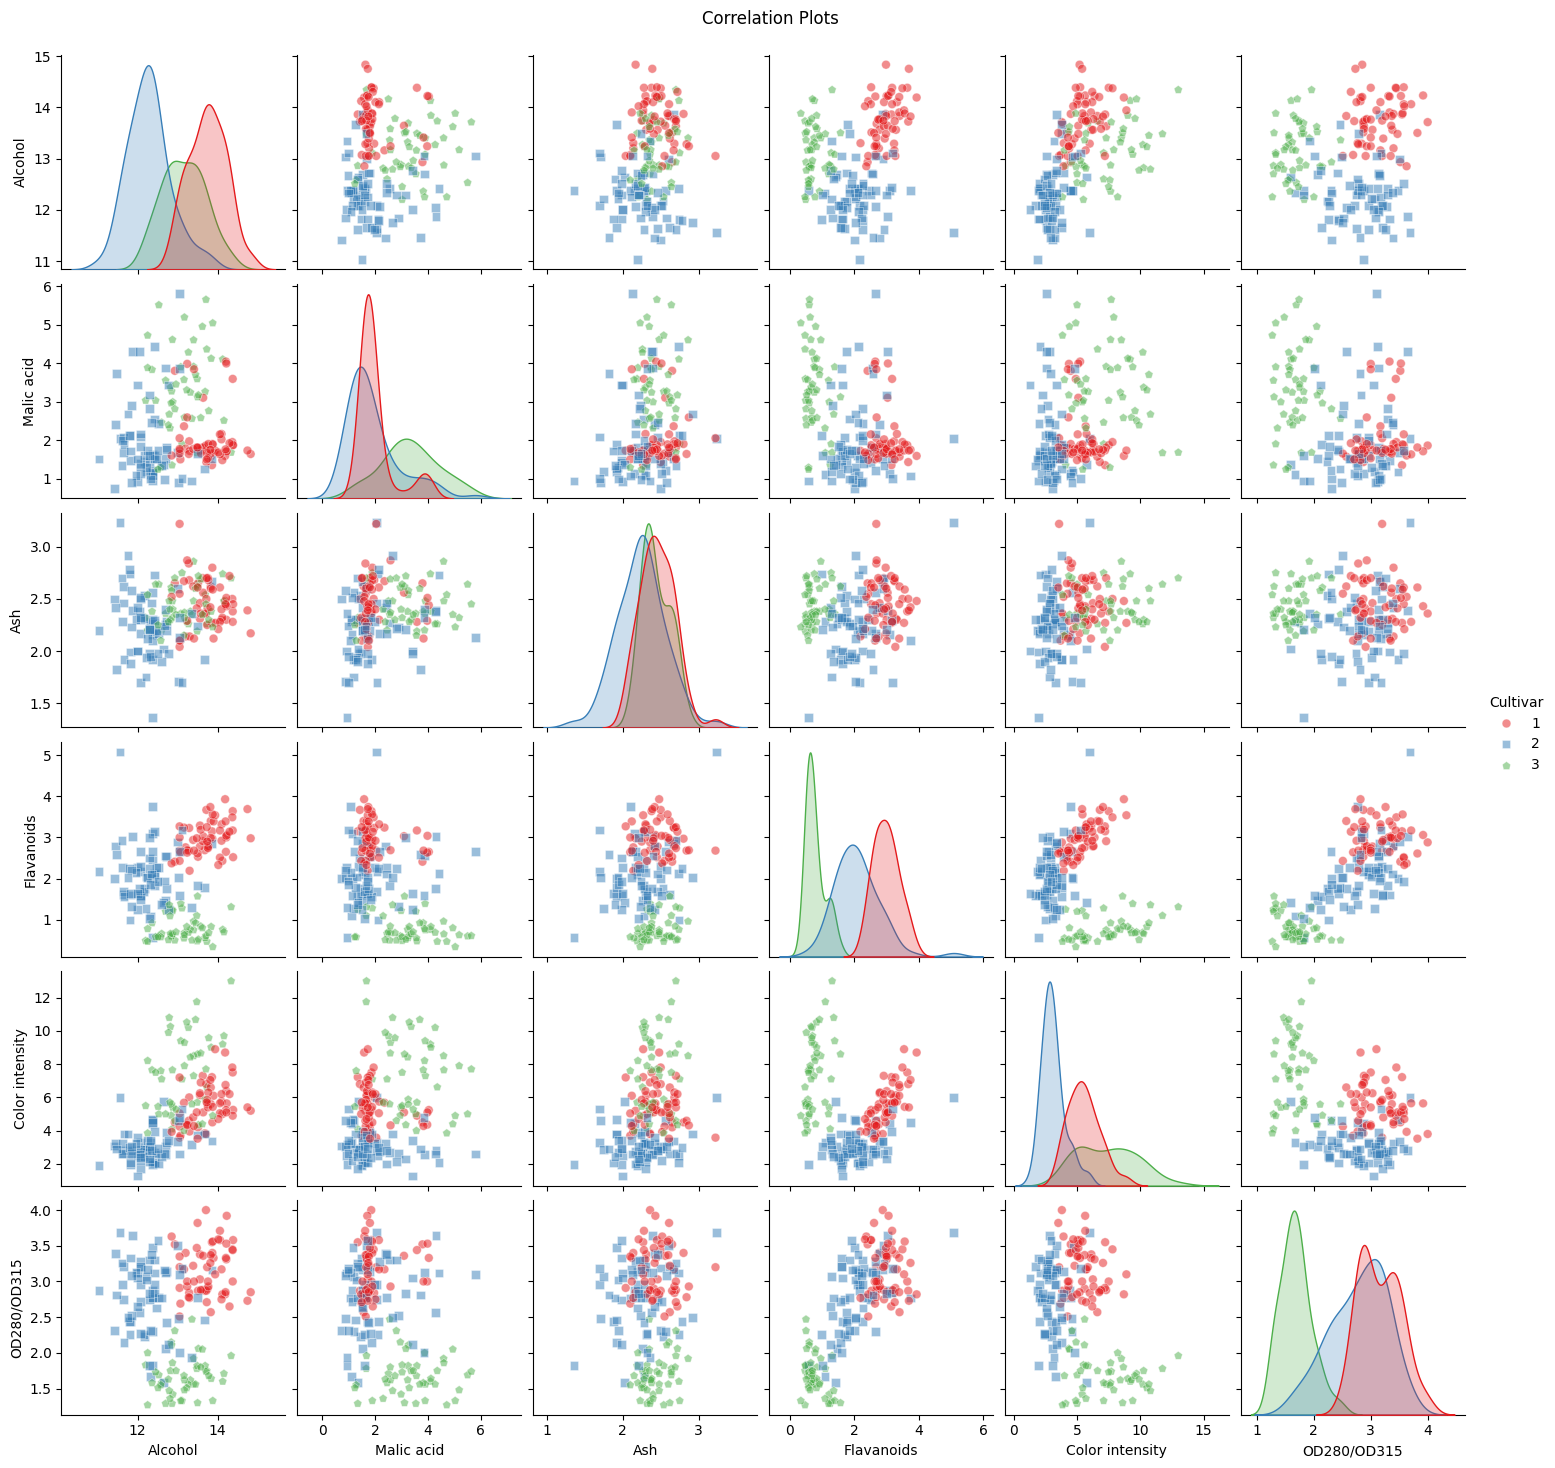

In [14]:
sns.pairplot(data, hue='Cultivar', palette='Set1', markers=['o', 's', 'p'], plot_kws={"s": 40, "alpha": 0.5})
plt.suptitle("Correlation Plots")
plt.subplots_adjust(top=0.95)  #odstęp na tytuł wykresów
plt.show()


### Zadanie 5: Regresja liniowa [10 pkt]

#### a) Manualne obliczanie współczynników równania regresji liniowej

Korzystając z metody najmniejszych kwadratów manualnie oblicz współczynniki równania regresji liniowej `a_1` i `b_1` parametru Flavanoids (oś Y) od OD280/OD315 (oś X).

In [15]:
# YOUR CODE HERE
Y = data.loc[:,'Flavanoids']
X = data.loc[:,'OD280/OD315']

x_mean = np.mean(X)
y_mean = np.mean(Y)
n = len(X)

licznik_a_1 = np.sum((X - x_mean) * (Y - y_mean))
mianownik_a_1 = np.sum((X - x_mean)**2)

if mianownik_a_1 != 0:
  a_1 = licznik_a_1 / mianownik_a_1
else:
  a_1=0

b_1 = y_mean - (a_1 * x_mean)

a_1, b_1


(1.107473331774143, -0.8631022610964245)

In [16]:
# Komórka testowa
assert np.isclose(a_1, 1.107473331774143)
assert np.isclose(b_1, -0.8631022610964245)

#### b) Obliczanie współczynników równania regresji liniowej z wykorzystaniem dedykowanych funkcji

Korzystając z funkcji `scipy.stats.linregress()` oblicz współczynniki równania regresji liniowej `a_2` i `b_2` parametru Flavanoids (oś Y) od OD280/OD315 (oś X).

In [17]:
# YOUR CODE HERE

Y = data.loc[:,'Flavanoids']
X = data.loc[:,'OD280/OD315']

result = linregress(X, Y)
a_2 = result.slope
b_2 = result.intercept

a_2, b_2

(1.1074733317741432, -0.863102261096425)

In [18]:
# Komórka testowa
assert np.isclose(a_2, 1.1074733317741432)
assert np.isclose(b_2, -0.863102261096425)

#### c) Porównanie wyników z wizualizacją

Funkcja `seaborn.regplot()` pozwala na wykonanie wykresu korelacyjnego, jednak nie zwraca wyliczonych współczynników regresji. W celu przetestowania identyczności obu rozwiązań wykonaj wykres z wykorzystaniem funkcji `seaborn.regplot()` i korzystając z funkcji `matplotlib.pyplot.plot()` lub `seaborn.lineplot()` nałóż na niego przerywaną linię wyznaczoną na podstawie wyliczonych wcześniej współczynników równania regresji liniowej parametru Flavanoids (oś Y) od OD280/OD315 (oś X).

Przygotowując figurę kieruj się wytycznymi z początku notatnika.

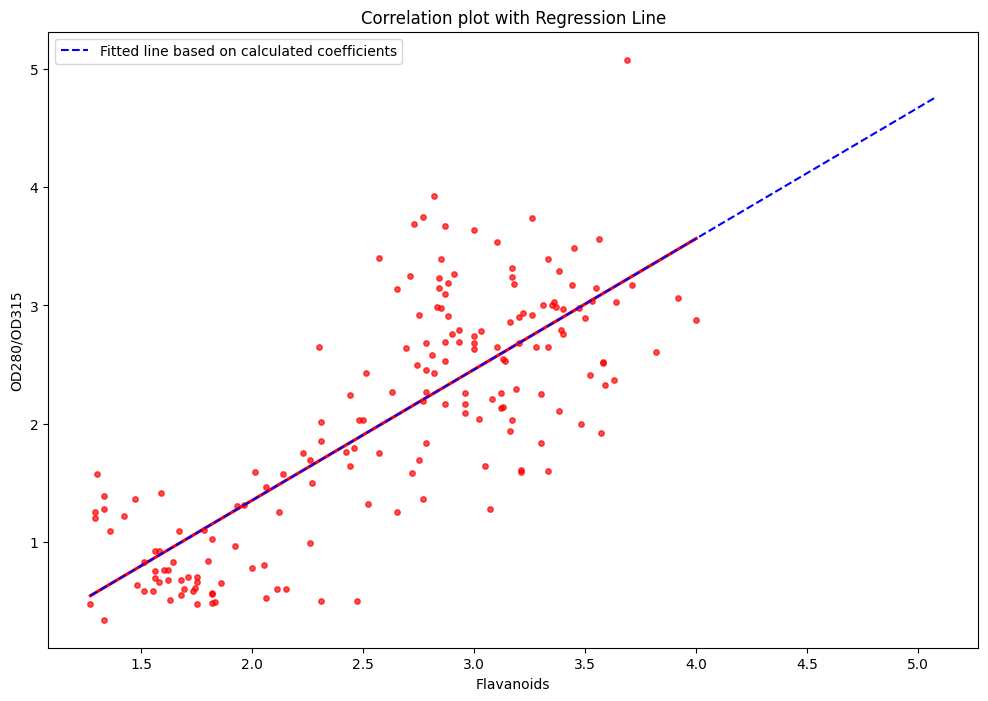

In [19]:
# YOUR CODE HERE

plt.figure(figsize=(12, 8),  facecolor='white')
yc = data.loc[:,'Flavanoids']
xc = data.loc[:,'OD280/OD315']
sns.regplot(x=xc, y=yc, ci=None, scatter_kws={'alpha':0.7, 's':15, 'color':'red'},line_kws={'color':'red'})


x_values = np.linspace(xc.min(), yc.max(), 10)
y_values = a_1 * x_values + b_1


plt.plot(x_values, y_values, 'b--', label='Fitted line based on calculated coefficients')
plt.title('Correlation plot with Regression Line')
plt.xlabel('Flavanoids')
plt.ylabel('OD280/OD315')

plt.legend()
plt.show()


#### d) Wykresy korelacyjne z prostą regresji

Korzystając z funkcji `seaborn.pairplot()` przygotuj wykresy korelacyjne z prostą regresji zestawiające ze sobą poszczególne parametry (osie X, Y) dla kompletu danych oraz z podziałem na poszczególne odmiany winogron (rozróżnione kolorem) i ustaw:
 - dla wykresu z całością danych inny od domyślnego kolor, a dla wykresu z podziałem na odmiany inną od domyślnej skalę kolorów (każda odmiana ma przypisany inny kolor wykresu),
 - inne od domyślnych własności punktów (kształt, wielkość, przeźroczystość) dobrane tak, aby wykres był jak najbardziej czytelny.
 - prosta regresji wyświetlana bez przedziału ufności.
 - na przekątnej siatki wykresów wyświetlały się wykresy typu kde.

Text(0.5, 1.04, 'Pairplot of the Entire Dataset with Regression Lines')

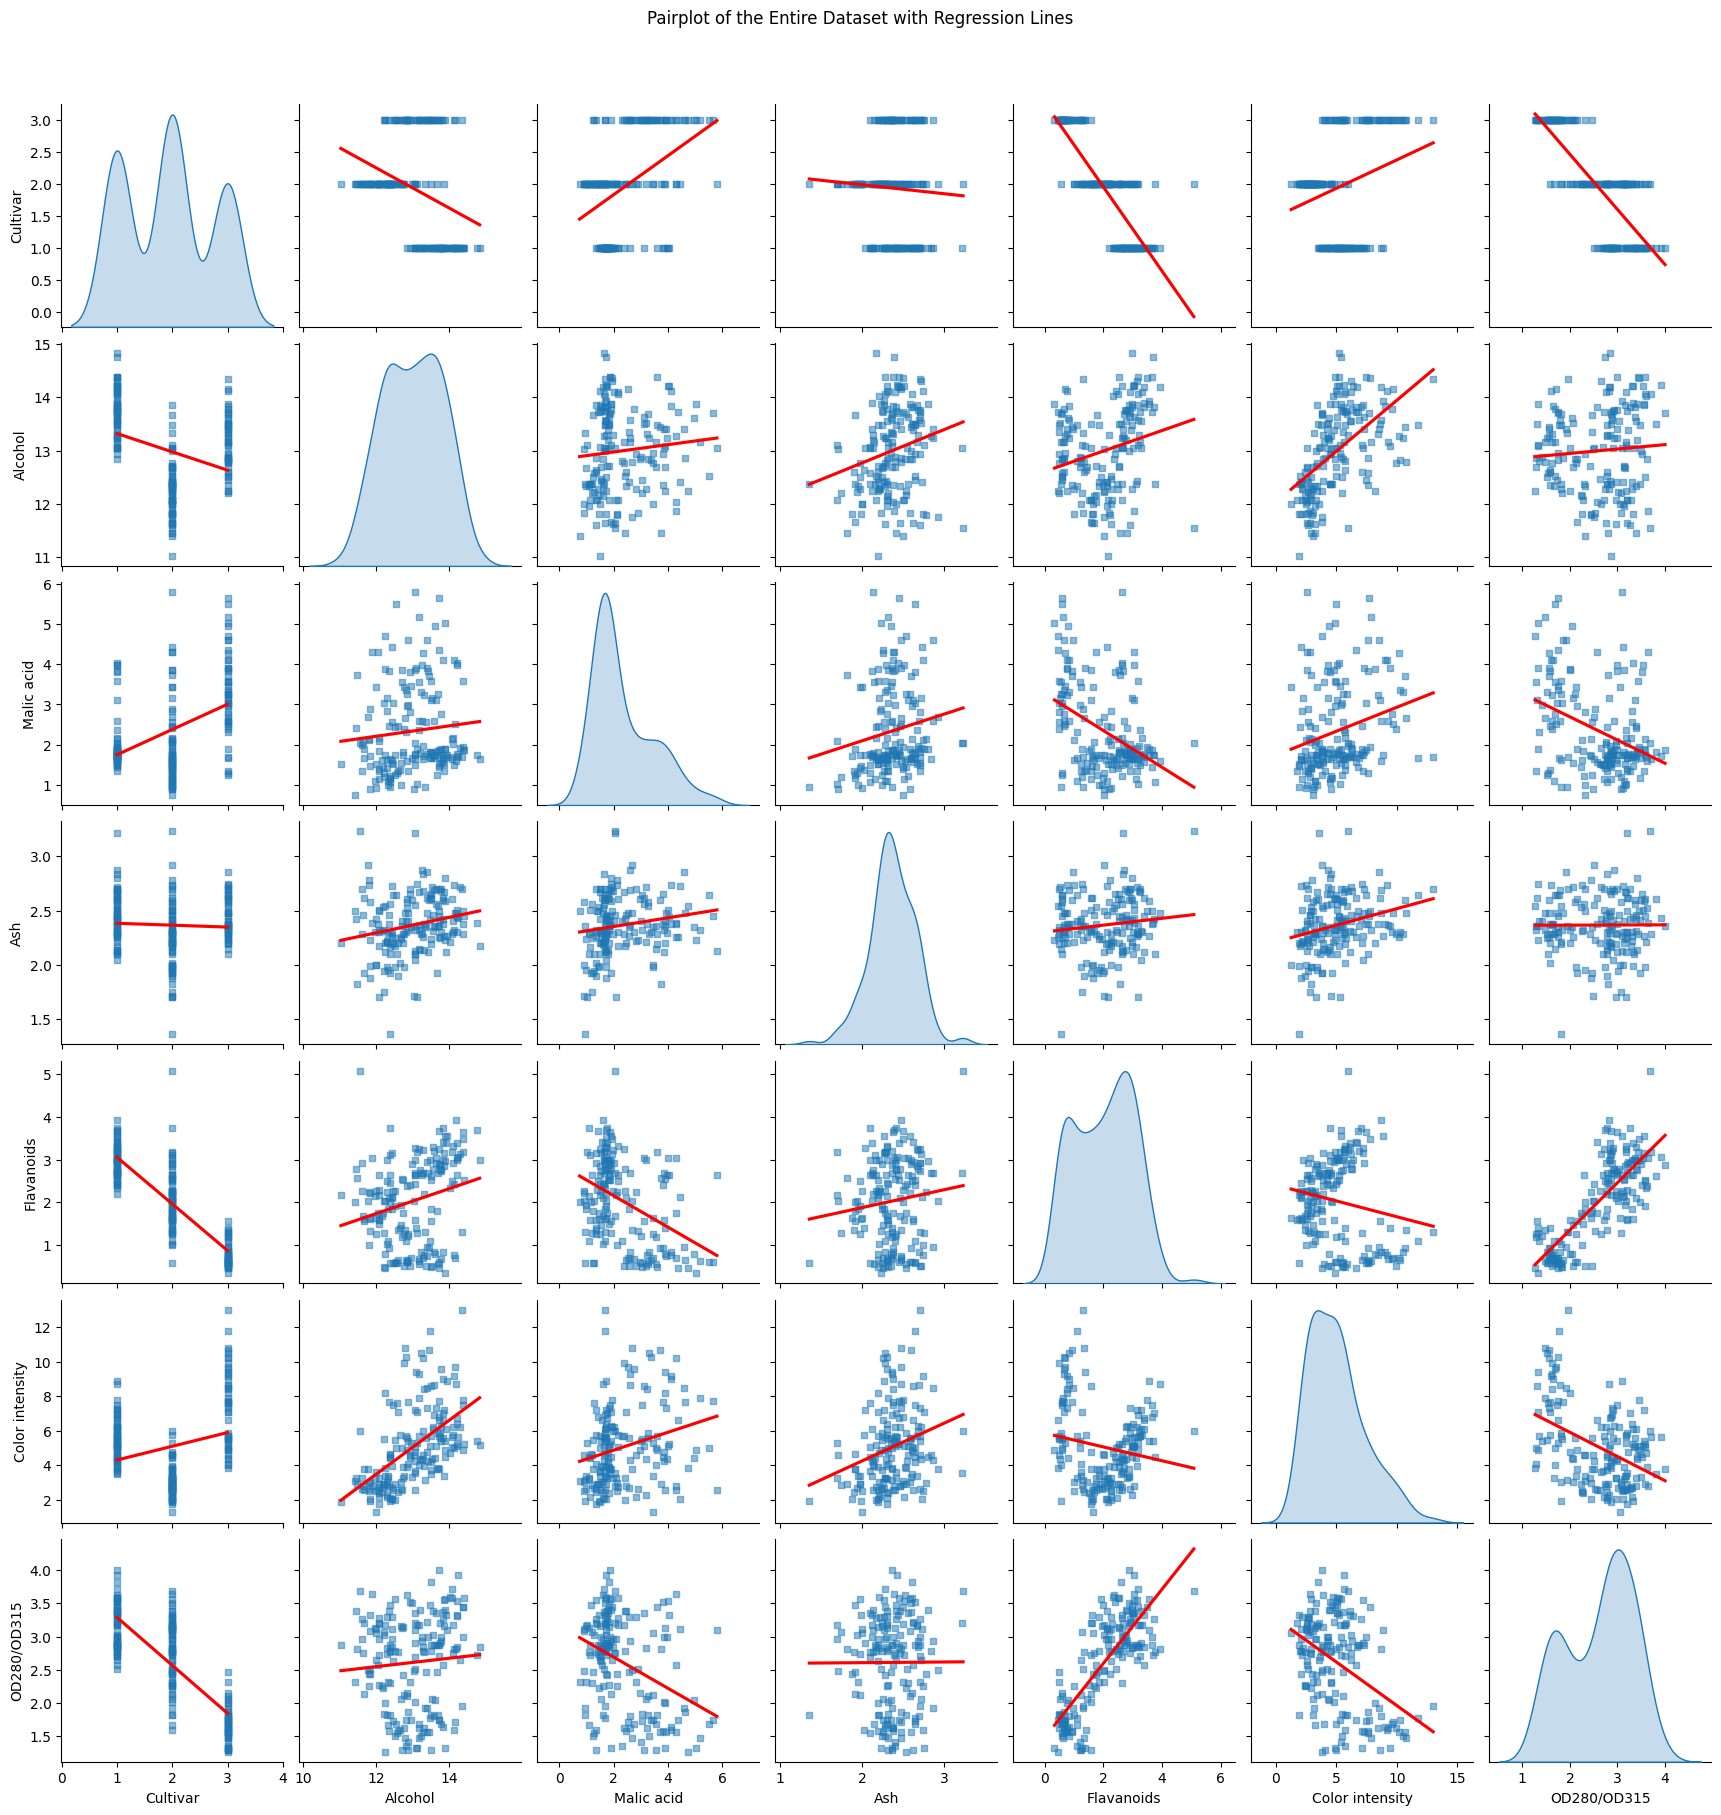

In [22]:
# Całość danych
# YOUR CODE HERE

pairplot_all = sns.pairplot(data, kind="reg", markers=['s'], plot_kws={'line_kws':{'color':'red'}, 
                                                                       'scatter_kws': {'alpha': 0.5, 's': 20}, 'ci': None}, diag_kind="kde")
pairplot_all.fig.suptitle('Pairplot of the Entire Dataset with Regression Lines', y=1.04)


Text(0.5, 1.04, 'Pairplot with Regression Lines by Cultivar')

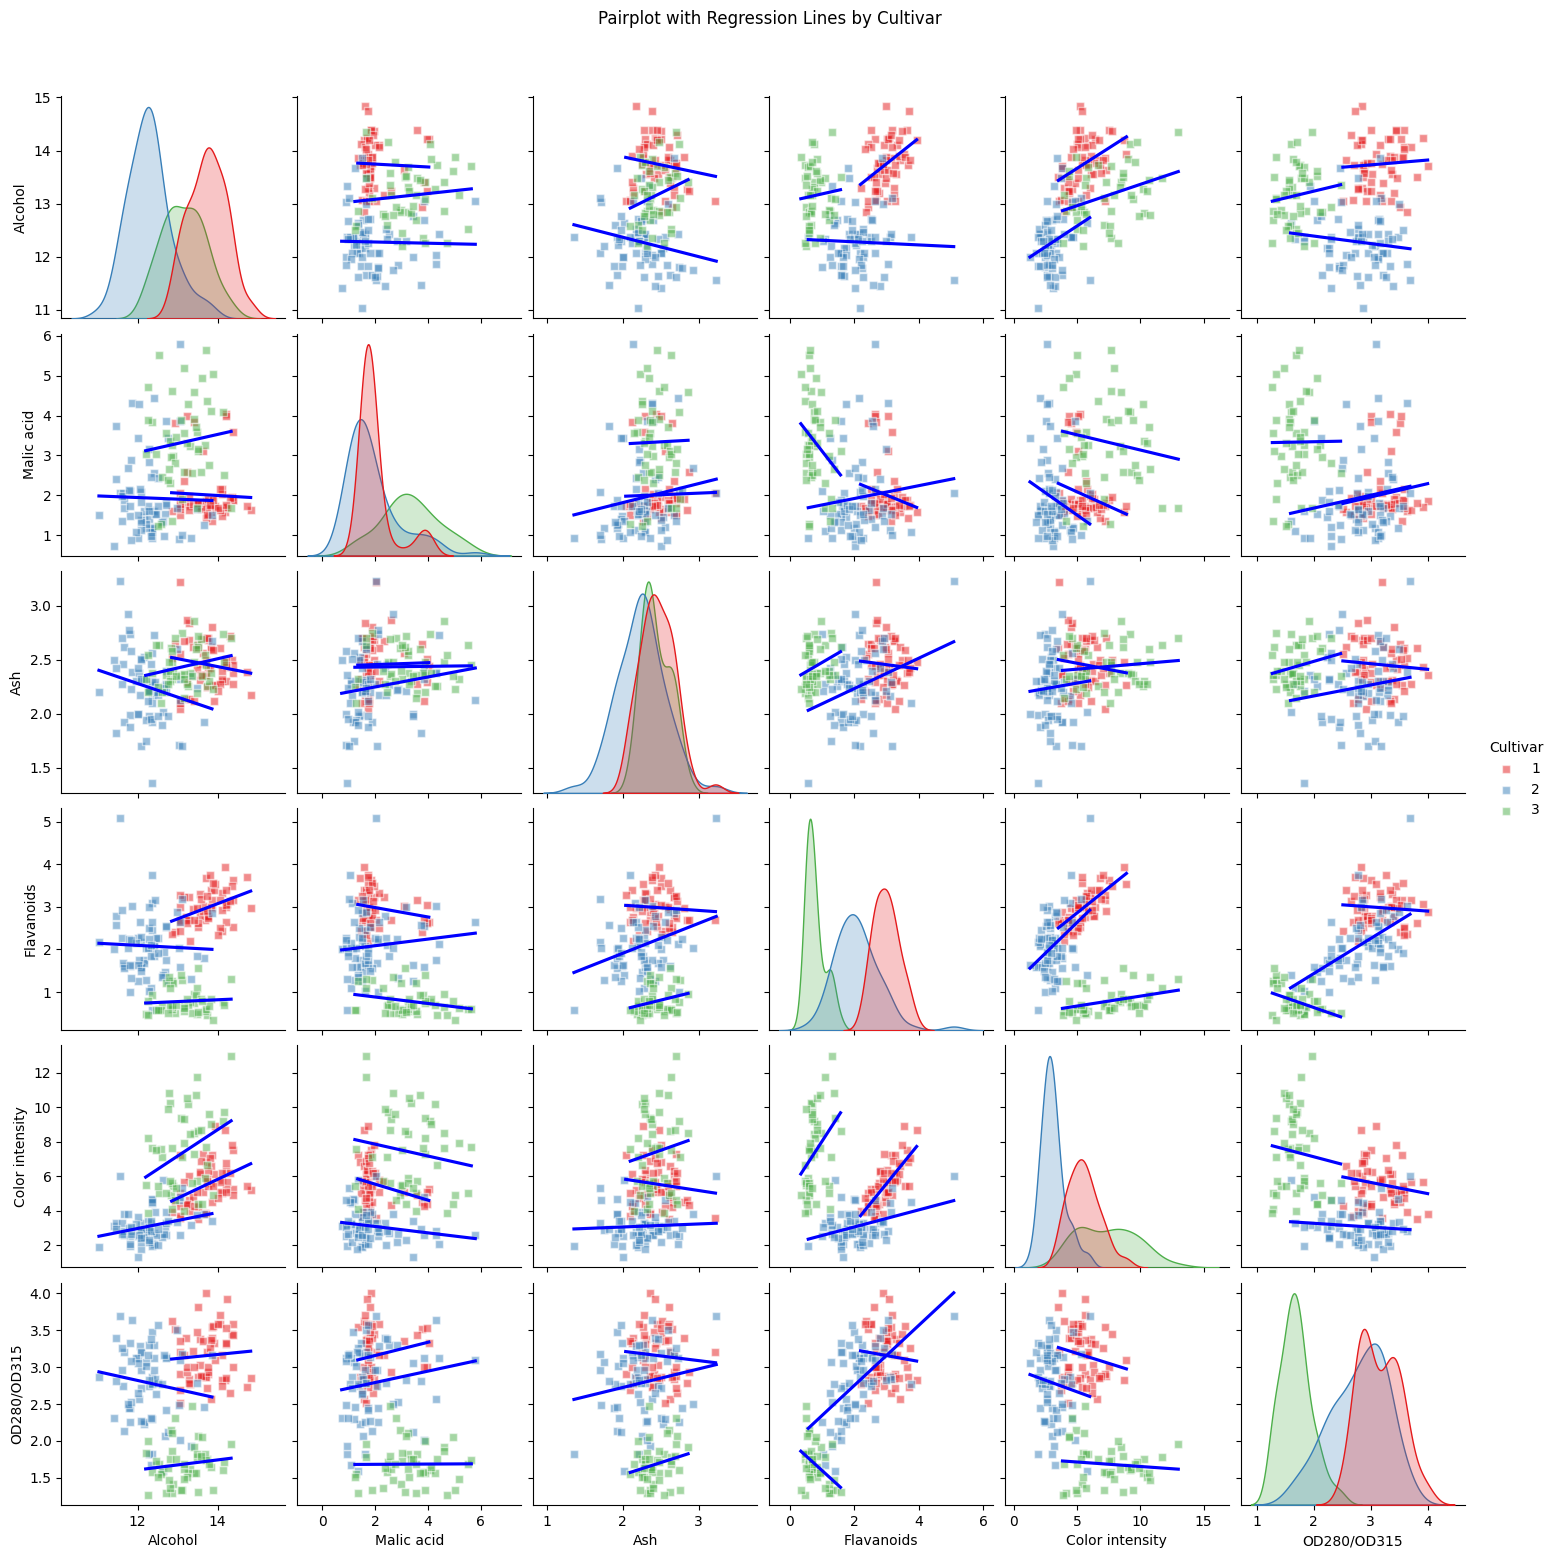

In [23]:
# Z podziałem na odmiany
# YOUR CODE HERE

pairplot_cultivar = sns.pairplot(data, kind="reg", 
                                 hue="Cultivar", palette="Set1",
                                 plot_kws={'line_kws':{'color':'blue'}, 
                                           'scatter_kws': {'alpha': 0.5, 's':30.0, 'edgecolor':'w'}, 'ci': None,'marker':'s'},
                                 diag_kind="kde")

pairplot_cultivar.fig.suptitle('Pairplot with Regression Lines by Cultivar', y=1.04)